## PHYS 105A:  Introduction to Scientific Computing

# Minimization or Maximization

In this assignment, we will modify the gradient descent method and use it to solve for perform curve fitting.

* In this assignment, we will model that we are working on experiment.

* We will generate mock data that we know the underlaying funciton with noise.

* We will then fit a polynomial to it.

In [1]:
# Step 1. Import Libraries

import numpy as np
from matplotlib import pyplot as plt

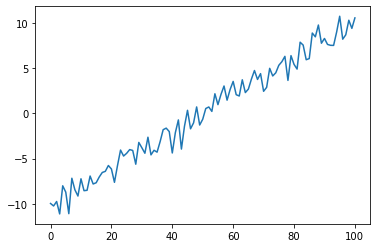

In [2]:
# Step 2. Create our model and add noise to it.

def boxcar(t):
    return -10 + 2 * t

N = 101
T = np.linspace(0, 10, N)
X = boxcar(T) + np.random.normal(size=N)

plt.plot(X)

In [3]:
# Step 3. Copy the minimization method that we implemented during the lecture
#
# In the lecture, we want to fit f(x) or f(x, y).  What variables we want to fit here?

def minimize(f, f_x, f_y, x, y, alpha, acc=1e-3, nmax=1000):
    l = np.array([x, y])
    for i in range(nmax):
        z   = f(x, y)
        z_x = f_x(x, y)
        z_y = f_y(x, y)
        if z_x*z_x + z_y*z_y <= acc * acc:
            return l
        if i % 2 == 0:
            x -= alpha * z_x
        else:
            y -= alpha * z_y
        l = np.vstack((l, [x, y]))
            
    raise Exception("Too many iterations", l)
    
# What input do we need to perform curve fitting?

In [4]:
# Step 4. Define what we need for curve fitting
#
# Note that our minimization code only works for two variables.
# Which two variables do we want to use?
#
# Hint: by using closure in python,
# we don't need to use T and X as function arguments!

def chisq(a, b):
    return np.mean((a + b * T - X)**2)

def chisq_a(a, b):
    return 2 * np.mean(a + b * T - X)
    
def chisq_b(a, b):
    return 2 * np.mean((a + b * T - X) * T)

In [5]:
# Step 5. Fit the curve

try:
    l1 = minimize(chisq, chisq_a, chisq_b, 0, 0, 0.1)
except Exception as e:
    print('Failed')
    l1 = e.args[1]
    
print(l1)

Failed
[[ 0.00000000e+00  0.00000000e+00]
 [-1.91166192e-03  0.00000000e+00]
 [-1.91166192e-03  3.45506655e+00]
 ...
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]]


/opt/local/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-3-deff150af7d8>:11: RuntimeWarning: overflow encountered in double_scalars
  if z_x*z_x + z_y*z_y <= acc * acc:
<ipython-input-4-da155ad09e75>:10: RuntimeWarning: overflow encountered in square
  return np.mean((a + b * T - X)**2)
<ipython-input-4-da155ad09e75>:10: RuntimeWarning: invalid value encountered in multiply
  return np.mean((a + b * T - X)**2)
<ipython-input-4-da155ad09e75>:13: RuntimeWarning: invalid value encountered in multiply
  return 2 * np.mean(a + b * T - X)
<ipython-input-4-da155ad09e75>:16: RuntimeWarning: invalid value encountered in multiply
  return 2 * np.mean((a + b * T - X) * T)


In [6]:
# Step 6. Adjust the initial guess and step size

try:
    l1 = minimize(chisq, chisq_a, chisq_b, 0, 0, 0.01)
except Exception as e:
    print('Failed')
    l1 = e.args[1]
    
print(l1)

Failed
[[ 0.00000000e+00  0.00000000e+00]
 [-1.91166192e-04  0.00000000e+00]
 [-1.91166192e-04  3.45334606e-01]
 ...
 [-9.36763607e+00  1.91324256e+00]
 [-9.37179877e+00  1.91324256e+00]
 [-9.37179877e+00  1.91386541e+00]]


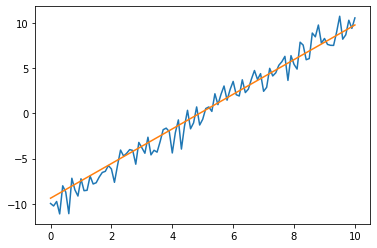

In [7]:
# Step 7. Overplot the data and the results

a, b = l1[-1,:]

plt.plot(T, X)
plt.plot(T, a + b * T)

## Question

We learned in the lecture, and tried it in this assignment that the step size is important.  If we choose too small a step size, the numerical scheme may be unstable and oscillate around the true solution forever.

Can we simply always choose a very small step size?  What are the advantage and disadvantage of it?

Describe a strategy to adjust the step size so that the minimizer is more robust.

Please write down your answer in the next cell.

...